In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import style
style.use('seaborn')

/tmp/ipykernel_13520/1900012673.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  style.use('seaborn')


In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'ph', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# EDA

In [4]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## Target 
Lets understand how the target variable is distributed in the dataset.

<AxesSubplot: >

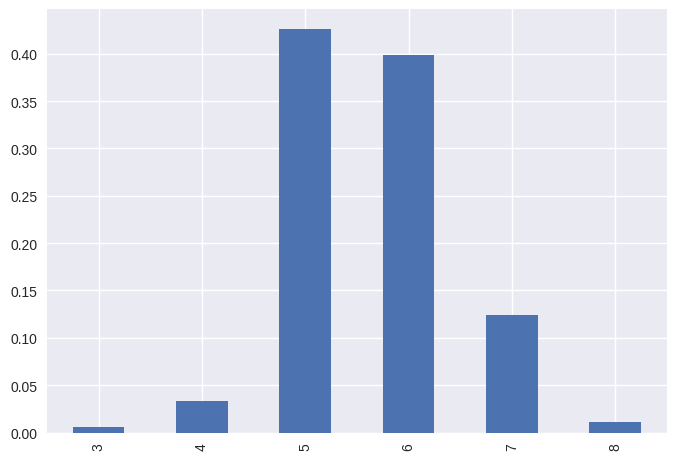

In [7]:
df.quality.value_counts(normalize=True).sort_index().plot.bar()

*Wine Quality* is a score from 0-10. However, in the dataset that we have available, we see that we only have wines with quality from 3-8. One thing we can do, is convert *Quality* into a binary problem: Bad or Good wine depending on a *quality* cutoff. 

Another thing to observe is that dataset is unbalanced. About ~70% of the dataset is in the quality range of 5 and 6. This unbalancing issue could also be propagated even if we use the good-bad wine approach. For example, if wines are good if their quality is >= 7, then only about the 15% of the dataset will be consider good wine. This is something to think about when we perform dataset splitting

## Features

Lets checkout the features. 
- Do we have missing data?
- Is the correlation between the features high? 

### Missing data

In [15]:
df.isnull().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

We see that there is no missing data in this dataset.

Now, lest take a look at the correlation matrix. We are just gonna use the features

In [16]:
features = df.columns.tolist()
features.remove('quality')

<AxesSubplot: >

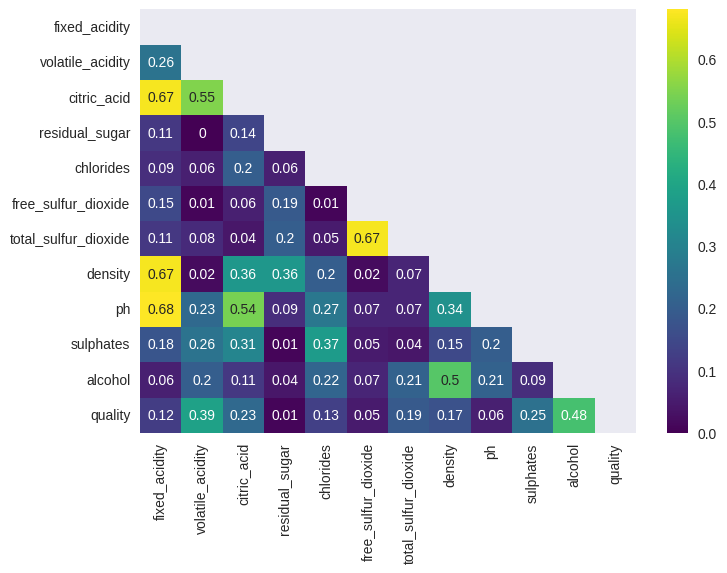

In [26]:
corr = df[features+['quality']].corr().round(2).abs()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,annot=True,cmap='viridis',mask = mask)

We see that some of the features have quite high correlation. 

-   free_sulfur_dioxide,total_sulfur_dioxide
-   citric_acid,fixed_acidity
-   density,fixed_acidity
-   ph,fixed_acidity

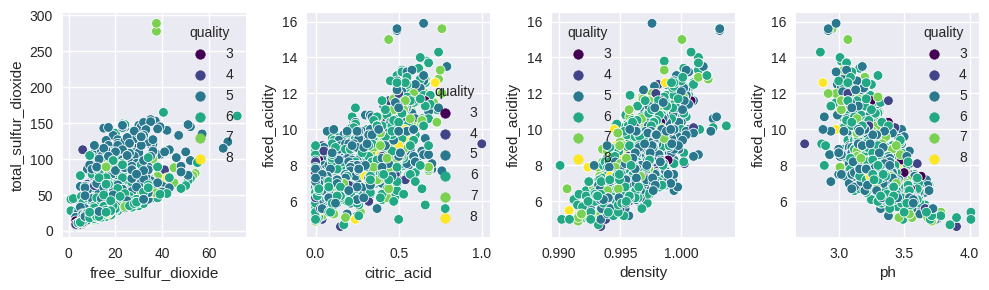

In [25]:
pairs = [
        ('free_sulfur_dioxide','total_sulfur_dioxide'),
        ('citric_acid','fixed_acidity'),
        ('density','fixed_acidity'),
        ('ph','fixed_acidity'),
        ]

fig,ax =plt.subplots(ncols=len(pairs),figsize=(10,3))
for i,pair in enumerate(pairs):
    x,y =pair 
    sns.scatterplot(x=x,y=y,hue='quality',palette='viridis',data=df,ax=ax[i])
    ax[i].set_aspect('auto')
fig.tight_layout()

In [43]:
melt

,quality,variable,value
0,5,free_sulfur_dioxide,11.00
1,5,free_sulfur_dioxide,25.00
2,5,free_sulfur_dioxide,15.00
3,6,free_sulfur_dioxide,17.00
4,5,free_sulfur_dioxide,11.00
...,...,...,...
9589,5,ph,3.45
9590,6,ph,3.52
9591,6,ph,3.42
9592,5,ph,3.57


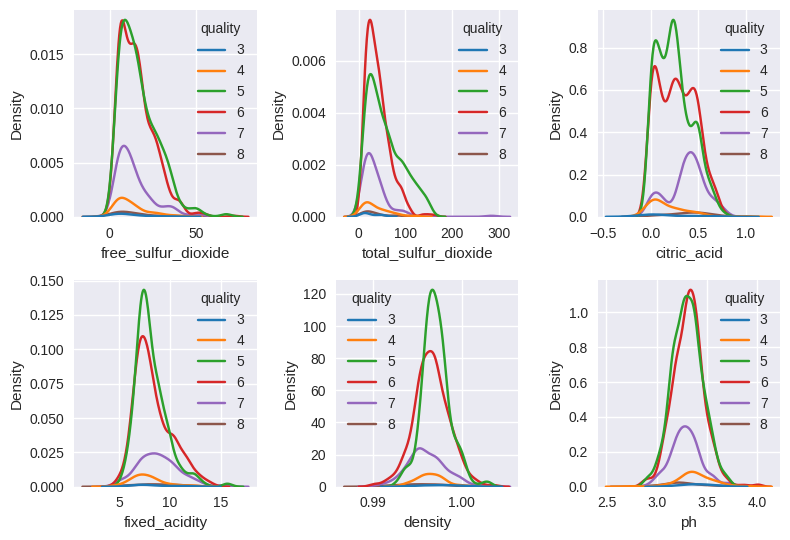

In [53]:
foo = ['free_sulfur_dioxide','total_sulfur_dioxide','citric_acid','fixed_acidity','density','ph']

fig,axes  = plt.subplots(ncols=3,nrows=2)
ax = axes.flatten()
for i,f in enumerate(foo):
    sns.kdeplot(x=f,hue='quality',palette='tab10',common_norm=True,data=df,ax=ax[i])

fig.tight_layout()
